<a href="https://colab.research.google.com/github/annlj/MLBootcamp21_Assignment/blob/main/MLBootcamp21_House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Assignment

- Welcome to the final assignment! Read all instructions very carefully
- You will be tested on the following topics:
  - Basic python programming(1 question)
  - Pandas dataframe manipulation/filtering(3 questions)
  - Plotting charts(1 question)
  - A 10-question quiz

****Important note: Only use the "train.csv" file unless specified otherwise****

 - Download the dataset located here: https://www.kaggle.com/c/home-data-for-ml-course/data?select=train.csv

- Remember that you will only be able to download the dataset if you register for the competition

- If you are unable to download the data from the kaggle website then check the "Week 5" folder inside the regular google drive link for this bootcamp

- Each question will need you to store your answer in the variable names exactly as specified in each cell so please do not change that. If you answer needs you to define a function then make sure the name of the function is exactly as shown in the question

- ****For some of the question you may have to refer to the "data_description.txt" file provided along with the dataset****

- All the best and hope you enjoyed the course and learned a lot to kickstart your data science journey!

## This is a link to the Google Form which contains 10 questions for you to answer. 
# Submit the Google Form first before moving on to the rest of the assignment

https://forms.gle/S78HX7yEZFsGyJZX9

In [ ]:
import pandas as pd
import numpy as np
import math
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
!pip install category_encoders
import category_encoders as ce
from sklearn.utils import resample
import matplotlib.pyplot as plt
import re
import seaborn as sb

## Q1. You would need to write a function to print the average marks for a given student's name. There are two inputs to your function: a dictionary and the name of the student. The output should just be the average of all their marks rounded to two decimal places. Name your function student_avg_score(score_dictionary, student_name). Use the python "round(result,2)" function as it is to round your answers as this will effect your mark for this question

Example:

- ****Input****:
          score_dictionary =  {
          'Student_A' : [56,75,80],
          'Student_B':[98,74,89],
          'Student_C':[45,87,59]
          }
          student_name = 'Student_B'
- ****Output****: 87

- ****Explanation/Reason****: In the input score_dictionary, we can see that the 'Student_B' scored 98, 74 and 89 in their 3 subjects. Now the student_name was 'Student_B'. So we picked that particular student and then took the average of their scores and then rounded the answer to 2 decimal places

- ****Verification****: Make a function call to your function using the syntax exactly as shown below <br> ```student_avg_score(score_dictionary = {'Student_A':[56,75,80],'Student_B':[98,74,89],'Student_C':[45,87,59]},student_name = 'Student_B')``` <br>and this should give you 87 for ***student_name='Student_B'***, 63.67 for ***student_name='Student_C'*** and 70.33 for ***student_name='Student_A'*** as the outputs


In [ ]:
#Import the necessary libraries here
from numpy import mean
import math

In [ ]:
#read the train.csv file here
def student_avg_score(score_dictionary,student_name):
    for i in range(0,3):
      
        if student_name == list(score_dictionary)[i]:
            return(list(map(lambda x: round(mean(score_dictionary[x]),2),score_dictionary))[i])
        
        else:
            i+=1

student_avg_score(score_dictionary = {'Student_A':[56,75,80],'Student_B':[98,74,89],'Student_C':[45,87,59]},student_name='Student_B')

87.0

## Q2. Find the number of missing values for each column in your train.csv data

- The output shold be in the form of a dictionary as shown below

        { 
          1st Column_name_here: Number of missing values for the 1st Column,
          2nd Column_name_here: Number of missing values for the 2nd Column,
          3rd Column_name_here: Number of missing values for the 3rd Column
          .
          .
          .
        }
  
- Name your variable ****df_missing_values****


In [ ]:
#report the number of null values per column as a dictionary
#Your answer below. Store your dictionary in this variable
#Import data 
df_train = pd.read_csv("sample_data/htrain.csv")
#Get count of NA values for each column
df_null_values = df_train[df_train.isnull().any(axis=1)].count()
#Convert dataframe to dictionary
df_missing_values = df_null_values.to_dict()
#Output
df_missing_values


{'1stFlrSF': 1460,
 '2ndFlrSF': 1460,
 '3SsnPorch': 1460,
 'Alley': 91,
 'BedroomAbvGr': 1460,
 'BldgType': 1460,
 'BsmtCond': 1423,
 'BsmtExposure': 1422,
 'BsmtFinSF1': 1460,
 'BsmtFinSF2': 1460,
 'BsmtFinType1': 1423,
 'BsmtFinType2': 1422,
 'BsmtFullBath': 1460,
 'BsmtHalfBath': 1460,
 'BsmtQual': 1423,
 'BsmtUnfSF': 1460,
 'CentralAir': 1460,
 'Condition1': 1460,
 'Condition2': 1460,
 'Electrical': 1459,
 'EnclosedPorch': 1460,
 'ExterCond': 1460,
 'ExterQual': 1460,
 'Exterior1st': 1460,
 'Exterior2nd': 1460,
 'Fence': 281,
 'FireplaceQu': 770,
 'Fireplaces': 1460,
 'Foundation': 1460,
 'FullBath': 1460,
 'Functional': 1460,
 'GarageArea': 1460,
 'GarageCars': 1460,
 'GarageCond': 1379,
 'GarageFinish': 1379,
 'GarageQual': 1379,
 'GarageType': 1379,
 'GarageYrBlt': 1379,
 'GrLivArea': 1460,
 'HalfBath': 1460,
 'Heating': 1460,
 'HeatingQC': 1460,
 'HouseStyle': 1460,
 'Id': 1460,
 'KitchenAbvGr': 1460,
 'KitchenQual': 1460,
 'LandContour': 1460,
 'LandSlope': 1460,
 'LotArea': 1

## Q3. Find the number of Two-Story houses that have an Overall Quality (overall material and finish of the house) greater than or equal to 5?

- Look at the "data_description.txt" file and understand the 'HouseStyle' column and 'OverallQual' columns to attempt this question.
- Use the pandas dataframe filters to do exactly as the question asks
- Store your result in a variable called ****good_quality_houses****

In [ ]:
#Write your answer below

good_quality_houses = df_train.loc[lambda df_train: df_train['HouseStyle'] == '2Story'].loc[df_train['OverallQual']>=5]
good_quality_houses

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,2.0,2008.0,WD,Normal,208500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,...,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5.0,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,...,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5.0,60.0,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,...,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,12.0,2008.0,WD,Normal,250000.0
7,8.0,60.0,RL,NaN,10382.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7.0,6.0,1973.0,1973.0,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,...,Y,SBrkr,1107.0,983.0,0.0,2090.0,1.0,0.0,2.0,1.0,3.0,1.0,TA,7.0,Typ,2.0,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235.0,204.0,228.0,0.0,0.0,0.0,NaN,NaN,Shed,350.0,11.0,2009.0,WD,Normal,200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,1443.0,60.0,FV,85.0,11003.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,10.0,5.0,2008.0,2008.0,Gable,CompShg,VinylSd,VinylSd,Stone,160.0,Ex,TA,PConc,Ex,TA,Av,GLQ,765.0,Unf,0.0,252.0,1017.0,GasA,...,Y,SBrkr,1026.0,981.0,0.0,2007.0,1.0,0.0,2.0,1.0,3.0,1.0,Ex,10.0,Typ,1.0,Ex,Attchd,2008.0,Fin,3.0,812.0,TA,TA,Y,168.0,52.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,4.0,2009.0,WD,Normal,310000.0
1447,1448.0,60.0,RL,80.0,10000.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8.0,5.0,1995.0,1996.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,438.0,Gd,TA,PConc,Gd,TA,No,GLQ,1079.0,Unf,0.0,141.0,1220.0,GasA,...,Y,SBrkr,1220.0,870.0,0.0,2090.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,1.0,TA,Attchd,1995.0,RFn,2.0,556.0,TA,TA,Y,0.0,65.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,12.0,2007.0,WD,Normal,240000.0
1450,1

## Q4. Find the number of 'Duplex' houses that have an Overall Quality (overall material and finish of the house) less 5?

- Look at the "data_description.txt" file and understand the Type of dwelling column and 'OverallQual' columns to attempt this question.
- Use the pandas dataframe filters to do exactly as the question asks
- Store your result in a variable called ****bad_quality_houses****

In [ ]:
#duplex lotconfig corner and overall condition bad
df_train = pd.read_csv("sample_data/htrain.csv")
bad_quality_houses = df_train.loc[lambda df_train: df_train['BldgType'] == 'Duplex'].loc[df_train['OverallQual']<5]
bad_quality_houses

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,...,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,...,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
78,79,90,RL,72.0,10778,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,...,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,136500
342,343,90,RL,NaN,8544,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,BrkFace,340.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,...,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
441,442,90,RL,92.0,12108,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,4,1955,1955,Gable,CompShg,VinylSd,VinylSd,BrkFace,270.0,TA,TA,CBlock,TA,TA,No,ALQ,133,Unf,0,1307,1440,GasA,...,N,FuseF,1440,0,0,1440,0,0,2,0,4,2,Fa,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,118000
736,737,90,RL,60.0,8544,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1950,1950,Gable,CompShg,Stucco,Stone,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,...,N,FuseF,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,93500
942,943,90,RL,42.0,7711,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,3,1977,1977,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,1440,Unf,0,0,1440,GasA,...,Y,SBrkr,1440,0,0,1440,2,0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,321,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,Oth,Abnorml,150000
1090,1091,90,RL,60.0,8544,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1950,1950,Gable,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,...,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1987.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,92900
1163,1164,90,RL,60.0,12900,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,Duplex,SFoyer,4,4,1969,1969,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,1198,Unf,0,0,1198,GasA,...,Y,SBrkr,1258,0,0,1258,2,0,0,2,0,2,TA,6,Typ,0,NaN,CarPort,1969.0,Unf,2,400,Fa,TA,Y,120,0,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Alloca,108959
1232,1233,90,RL,70.0,9842,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,1Story,4,5,1962,1962,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,...,Y,SBrkr,1224,0,0,1224,0,0,2,0,2,2,TA,6,Typ,0,NaN,C

## Q5. Use the matplotlib library of python to plot a histogram showing the distribution of the following data:
  - Overall quality of the houses. Use the variable name ****overall_qual_dist****
  - Roof style of the houses. Use the variable name ****roof_style_dist****

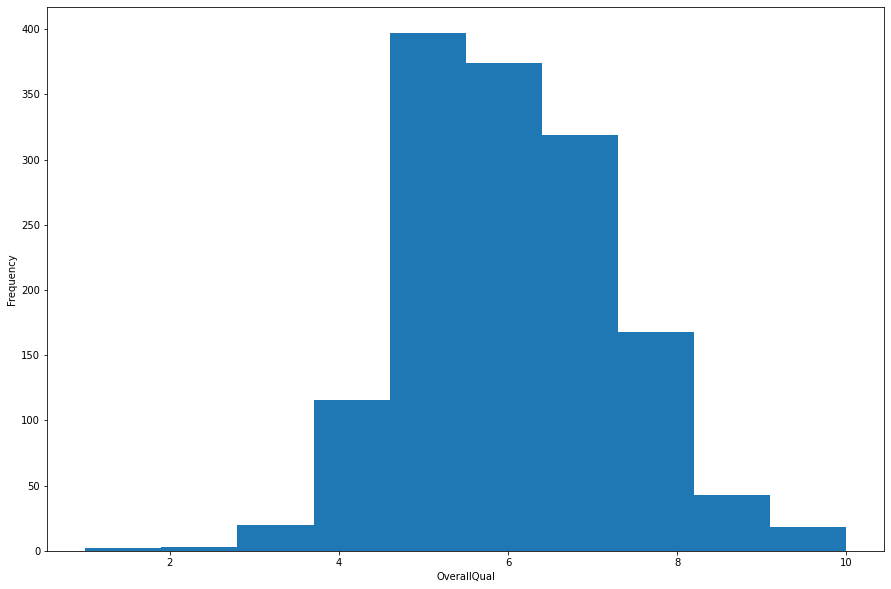

In [ ]:
# Write your code here to display the histogram
# Store your exact Command that you use to display the histogram in the variables as written in the question
# Import data set
df_train = pd.read_csv("sample_data/htrain.csv")

# Plot overall_qual_dist
plt.figure(figsize=(15,10))
plt.xlabel("OverallQual")
overall_qual_dist = df_train['OverallQual'].plot.hist()


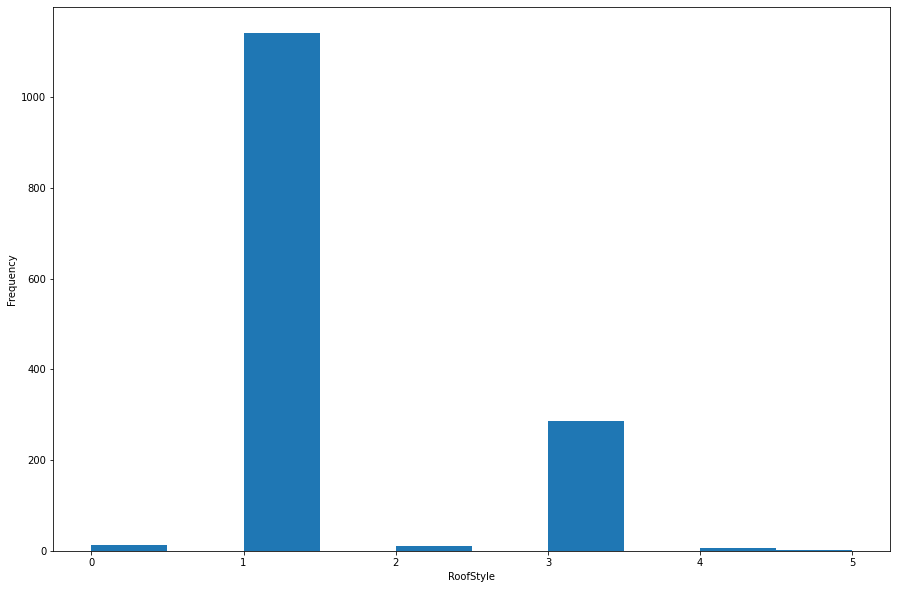

In [ ]:
# Import data set
df_train = pd.read_csv("sample_data/htrain.csv")
# Convert non-numerical values to numerical values in RoofStyle
df_train['RoofStyle_num'] = LabelEncoder().fit_transform(df_train['RoofStyle'])
df_train['RoofStyle_num']

# Plot roof_style_dist
plt.figure(figsize=(15,10))
plt.xlabel("RoofStyle")

roof_style_dist = df_train['RoofStyle_num'].plot.hist()


